In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams.update({'font.size': 7})


In [2]:
#var: time is the time component of the data vector in the time space

df=pd.read_csv(r"C:\Users\victo\OneDrive\Documents\GSU\DMLab\FFT\M1.csv", sep="\t")

dt = 12
time = np.arange(10, 720, dt)
n = len(time) #no of discrete data points

# M-CLASS FLARE

In [3]:
subdata = df[['TOTUSJH']].copy()
subdata['time'] = time.tolist()
subdata.head()

,TOTUSJH,time
0,980.993502,10
1,987.271725,22
2,985.015683,34
3,993.944093,46
4,994.364606,58


## Class-M data before FFT

Text(0, 0.5, 'TOTUSJH')

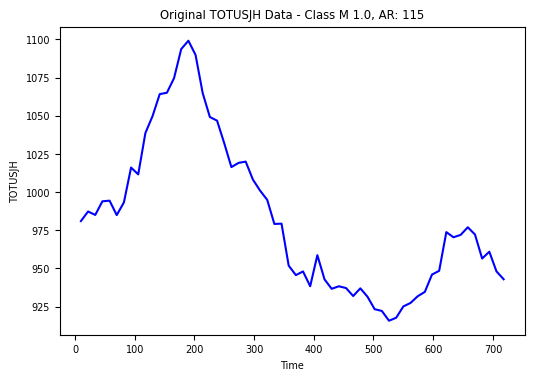

In [4]:
# Plot the original TOTUSJH data in time domain
plt.plot(time, subdata['TOTUSJH'], color='b')
plt.title('Original TOTUSJH Data - Class M 1.0, AR: 115')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

## Decomposed Class-M into Frquencies

Text(0, 0.5, 'TOTUSJH')

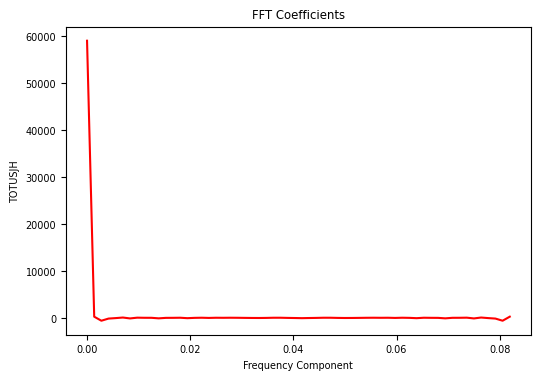

In [24]:
#plot FFT for the sampleM

fhat = np.fft.fft(subdata['TOTUSJH'],n) #compute the FFT
# PSD = fhat*np.conj(fhat)/n #powwer spectrum density per frequency
freq = (1/(dt*n)) * np.arange(n) #create x-axis of frequencies


plt.plot(freq,fhat, color='r')
plt.title('FFT Coefficients')
plt.xlabel('Frequency Component')
plt.ylabel('TOTUSJH')



### Decomposed Class-M into real & imaginary parts- ## Shift the negative frequencies to the left side

Text(0, 0.5, 'Magnitude')

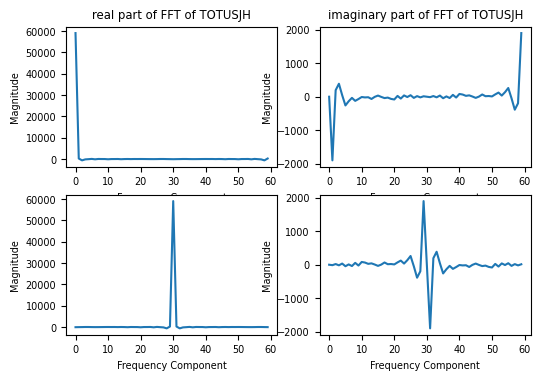

In [20]:

#plot the real part
plt.subplot(2,2,1)
plt.plot(np.real(fhat))
plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,2)
plt.plot(np.imag(fhat))
plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the real part
plt.subplot(2,2,3)
plt.plot(np.fft.fftshift(np.real(fhat)))
#plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,4)
plt.plot(np.fft.fftshift(np.imag(fhat)))
#plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

fhat = fhat

## Remove frequencies from 50-60

In [7]:


#next we go ahead to remove certain frequency coefficients-fhat that we seem as irrelevant and then 
#perform an inverse FFT to get the denoised data i.e to getting frequencies
indices = PSD >0.09    #find all frequencies with large power
PSDclean = PSD * indices  #zero out others
fhatfiltered = indices * fhat    #zero out small fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) #inverse FFT for filtered time signal



### Reconstructed Class-M data

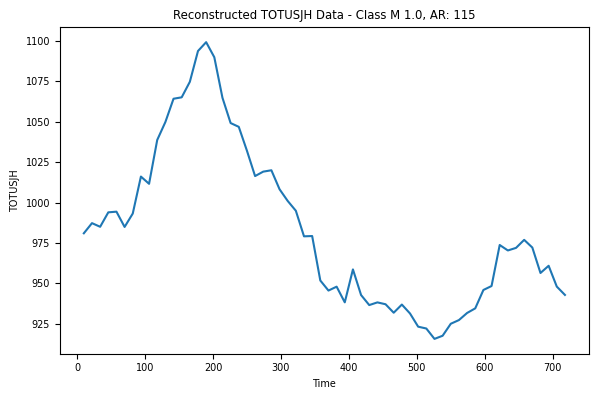

In [8]:
# Plot the reconstructed age data after IFFT

ifft_result = np.fft.ifft(fhat)
plt.plot(time, ifft_result)
plt.title('Reconstructed TOTUSJH Data - Class M 1.0, AR: 115')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\victo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\victo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


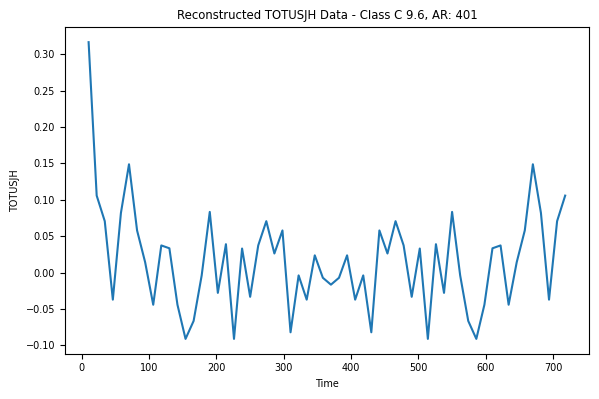

In [35]:
#next we go ahead to remove certain frequency coefficients-fhat that we seem as irrelevant and then 
#perform an inverse FFT to get the denoised data i.e to getting frequencies
indices = fhat >50    #find all frequencies with large power
# PSDclean = PSD * indices  #zero out others
ffilt = np.fft.ifft(indices) #inverse FFT for filtered time signal


plt.plot(time, ffilt)
plt.title('Reconstructed TOTUSJH Data - Class M 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


# C-CLASS FLARE

In [34]:
df1=pd.read_csv(r"C:\Users\victo\OneDrive\Documents\GSU\DMLab\FFT\C9.csv", sep="\t")

subdata1 = df1[['TOTUSJH']].copy()
subdata1['time'] = time.tolist()
subdata1.head()

,TOTUSJH,time
0,3301.362471,10
1,3344.495095,22
2,3377.004977,34
3,3356.425261,46
4,3398.838092,58


## Class-C data before FFT

Text(0, 0.5, 'TOTUSJH')

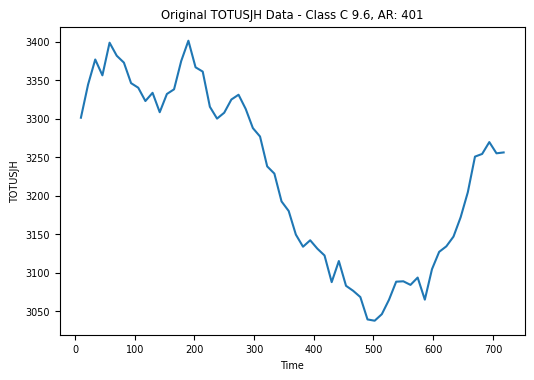

In [11]:
# Plot the original TOTUSJH data in time domain
plt.plot(time, subdata1['TOTUSJH'])
plt.title('Original TOTUSJH Data - Class C 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')




## Decomposed Class-C into Frquencies

Text(0, 0.5, 'TOTUSJH')

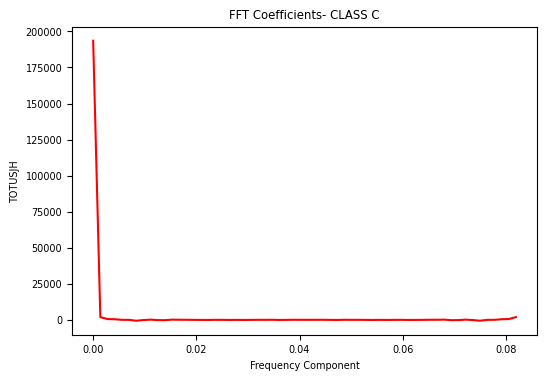

In [28]:
#plot FFT for the sampleC

fhat1 = np.fft.fft(subdata1['TOTUSJH'],n) #compute the FFT
# PSD1 = fhat1*np.conj(fhat)/n #powwer spectrum density per frequency
freq1 = (1/(dt*n)) * np.arange(n) #create x-axis of frequencies


plt.plot(freq1,fhat1, color='r')
plt.title('FFT Coefficients- CLASS C')
plt.xlabel('Frequency Component')
plt.ylabel('TOTUSJH')

### Decomposed Class-C into real & imaginary parts- ## Shift the negative frequencies to the left side


Text(0, 0.5, 'Magnitude')

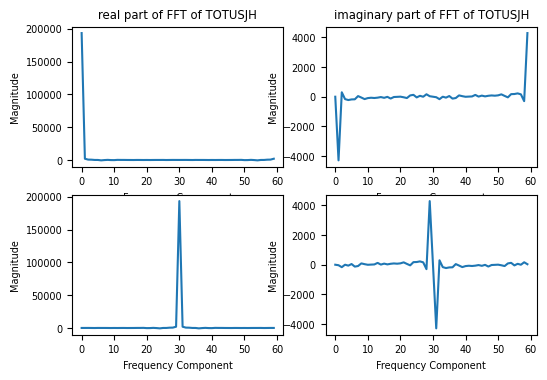

In [26]:

#plot the real part
plt.subplot(2,2,1)
plt.plot(np.real(fhat1))
plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,2)
plt.plot(np.imag(fhat1))
plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the real part
plt.subplot(2,2,3)
plt.plot(np.fft.fftshift(np.real(fhat1)))
#plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,4)
plt.plot(np.fft.fftshift(np.imag(fhat1)))
#plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

### Reconstructed Class-C data

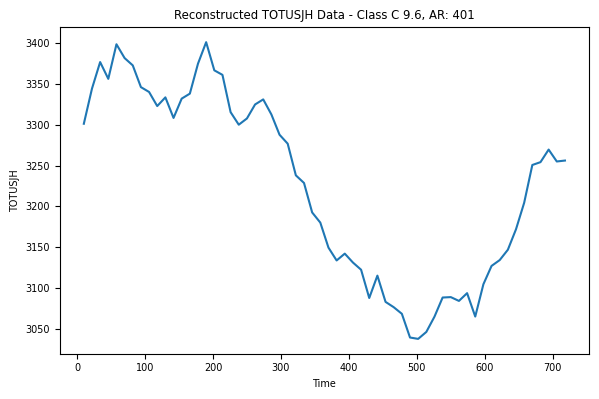

In [14]:
# Plot the reconstructed TOTUSJH data after IFFT

ifft_result1 = np.fft.ifft(fhat1)
plt.plot(time, ifft_result1)
plt.title('Reconstructed TOTUSJH Data - Class C 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


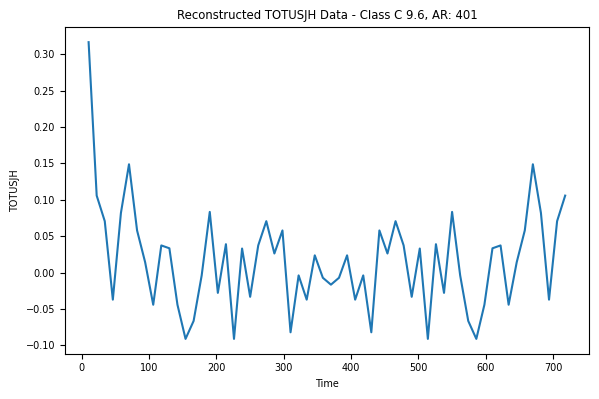

In [31]:
#next we go ahead to remove certain frequency coefficients-fhat that we seem as irrelevant and then 
#perform an inverse FFT to get the denoised data i.e to getting frequencies
indices = fhat1 >50    #find all frequencies with large power
# PSDclean = PSD * indices  #zero out others
ffilt = np.fft.ifft(indices) #inverse FFT for filtered time signal


plt.plot(time, ffilt)
plt.title('Reconstructed TOTUSJH Data - Class C 9.6, AR: 401')
plt.xlabel('Time')
plt.ylabel('TOTUSJH')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


Text(0, 0.5, 'Magnitude')

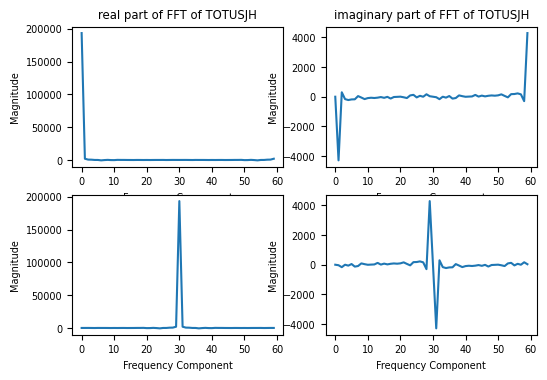

In [32]:

#plot the real part
plt.subplot(2,2,1)
plt.plot(np.real(fhat1))
plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,2)
plt.plot(np.imag(fhat1))
plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the real part
plt.subplot(2,2,3)
plt.plot(np.fft.fftshift(np.real(fhat1)))
#plt.title("real part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')

#plot the imaginary part
plt.subplot(2,2,4)
plt.plot(np.fft.fftshift(np.imag(fhat1)))
#plt.title("imaginary part of FFT of TOTUSJH")
plt.xlabel('Frequency Component')
plt.ylabel('Magnitude')